In [50]:
from QAOA_simulator import QAOA_run
import networkx as nx
import qokit.maxcut as mc
import numpy as np
from matplotlib import pyplot as plt

N = int(input('N ~ '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['num_QAOA_calls'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['num_QAOA_calls'])


QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")



{'gamma': array([-0.19091962,  0.42316621,  1.21087783]),
 'beta': array([1.05096061, 1.79452939, 1.74611   ]),
 'state': array([-2.04455508e-06+6.11805393e-08j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -2.04455508e-06+6.11805393e-08j]),
 'expectation': 1.9999999999832658,
 'overlap': 8.367897062559466e-12,
 'runtime': 0.012050867080688477,
 'num_QAOA_calls': 89}

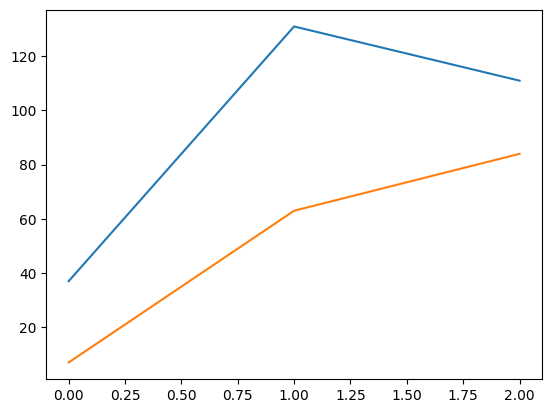

In [51]:
p_values = range(p)
#plt.scatter(p_values, qaoa_calls_bfgs)
plt.plot(p_values, qaoa_calls_cobyla)
plt.plot(p_values, qaoa_calls_bfgs)
plt.show()

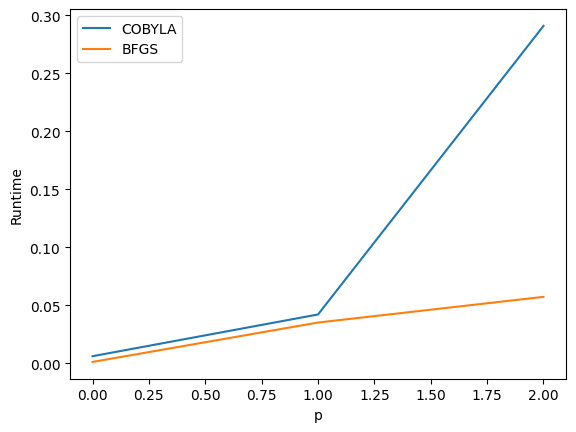

In [58]:
N = int(input('N = '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['runtime'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['runtime'])
#QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")

p_values = range(p)
fig, ax = plt.subplots()
ax.plot(p_values, qaoa_calls_cobyla, label="COBYLA") 
ax.plot(p_values, qaoa_calls_bfgs, label="BFGS")
ax.set_xlabel("p") #x軸に名前を付ける
ax.set_ylabel("Runtime") #y軸に名前を付ける
ax.legend() #グラフに名前を付ける
plt.show() #表示

#Next exercise is to add labes for x-axis and y-axis.

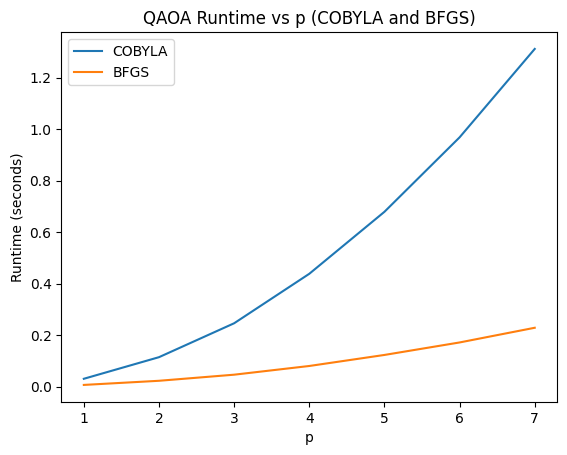

In [77]:
N = int(input('N = '))
p_max = int(input('p = '))
ising_model = np.array([])  # Replace with your actual Ising model
'''
ising_model = np.array([]) は、空の NumPy 配列を作成しています。
これは、Ising モデルの項を格納するためのプレースホルダーとして使用されています。
実際には、Ising モデルの具体的な項（スピン相互作用と外部磁場の項など）を格納する
ための配列を定義する必要があります。
'''
optimizer_method1 = "COBYLA"
optimizer_method2 = "BFGS"
#optimizer_options = {"rhobeg": 0.01 / N}
mixer = "x"

# Initialize gamma and beta with some values
p_values = []
for p in range(1,p_max+1):
    p_values.append(p)
runtimes1 = []
runtimes2 = []

for p in p_values:
    init_gamma = np.random.rand(p)
    init_beta = np.random.rand(p)
    runtimes1.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method1)["runtime"])
    runtimes2.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method2)["runtime"])

# Plotting p vs runtime
plt.plot(p_values, runtimes1, label="COBYLA")
plt.plot(p_values, runtimes2, label="BFGS")
plt.xlabel('p')
plt.ylabel('Runtime (seconds)')
plt.title('QAOA Runtime vs p (COBYLA and BFGS)')
plt.legend()
plt.show()

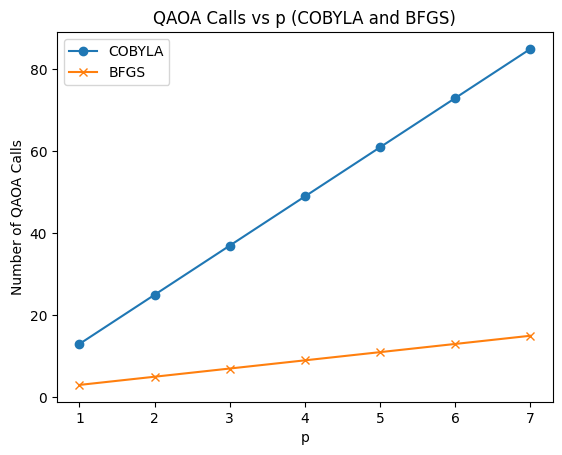

In [78]:
# 依存する関数とクラス（疑似コードとして定義）
from qokit.fur.qaoa_simulator_base import QAOAFastSimulatorBase, TermsType
import qokit.maxcut as mc

# グラフの描画
def plot_qaoa_calls_vs_p(N: int, p_values: list[int], ising_model: TermsType):
    qaoa_calls_cobyla = []
    qaoa_calls_bfgs = []

    for p in p_values:
        init_gamma = np.random.rand(p)
        init_beta = np.random.rand(p)

        # COBYLA
        optimizer_method_cobyla = "COBYLA"
        result_cobyla = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_cobyla,
        )
        qaoa_calls_cobyla.append(result_cobyla["num_QAOA_calls"])

        # BFGS
        optimizer_method_bfgs = "BFGS"
        result_bfgs = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_bfgs,
        )
        qaoa_calls_bfgs.append(result_bfgs["num_QAOA_calls"])

    plt.plot(p_values, qaoa_calls_cobyla, label="COBYLA", marker='o')
    plt.plot(p_values, qaoa_calls_bfgs, label="BFGS", marker='x')
    plt.xlabel('p')
    plt.ylabel('Number of QAOA Calls')
    plt.title('QAOA Calls vs p (COBYLA and BFGS)')
    plt.legend()
    #plt.grid(True)
    plt.show()

# 実行
N = int(input('N = '))  # 量子ビット数
p_max = int(input('p = '))
p_values = list(range(1, p_max + 1))
ising_model = np.array([])  # イジングモデル（適切な値に置き換える）
plot_qaoa_calls_vs_p(N, p_values, ising_model)

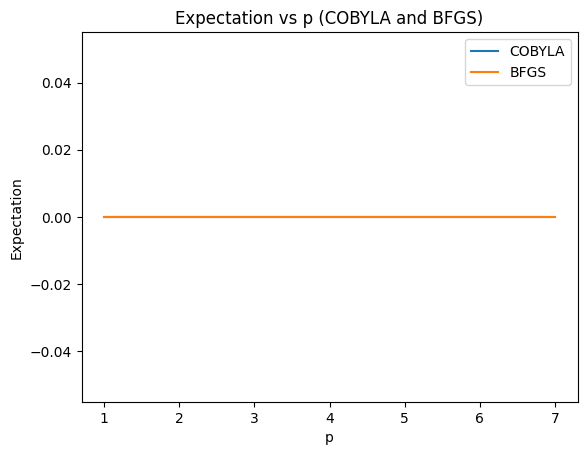

In [90]:
# グラフの描画
def plot_expectation_vs_p(N: int, p_values: list[int], ising_model):
    cobyla_expectations = []
    bfgs_expectations = []

    for p in p_values:
        init_gamma = np.random.rand(p)
        init_beta = np.random.rand(p)

        optimizer_method_cobyla = "COBYLA"
        result_cobyla = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_cobyla,
        )
        cobyla_expectations.append(result_cobyla["expectation"])

        optimizer_method_bfgs = "BFGS"
        result_bfgs = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_bfgs,
        )
        bfgs_expectations.append(result_bfgs["expectation"])

    plt.plot(p_values, cobyla_expectations, label="COBYLA")
    plt.plot(p_values, bfgs_expectations, label="BFGS")
    plt.xlabel('p')
    plt.ylabel('Expectation')
    plt.title('Expectation vs p (COBYLA and BFGS)')
    plt.legend()
    plt.show()

# ランダムなイジング模型
def generate_random_ising_model(N: int):
    h = np.random.rand(N)  # バイアス項の生成
    J = np.random.rand(N, N)  # 結合項の生成（ここでは対称行列として生成）
    J = (J + J.T) / 2  # 対称行列にする
    np.fill_diagonal(J, 0)  # 対角要素を0にする（自己結合はないと仮定）
    return {'h': h, 'J': J}

# 実行
N = int(input('N = '))  # 量子ビット数
p_max = int(input('p = '))
p_values = list(range(1, p_max + 1))
ising_model = np.array([])#generate_random_ising_model(N)  # イジング模型
plot_expectation_vs_p(N, p_values, ising_model)